In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy

In [2]:
def lambda_swap(alpha, beta_):
    return 0.5*(1 + np.sqrt(1 - 16*alpha*(1-alpha)*beta_*(1-beta_)))

def P(lambda_, delta):
    return 2*(2*(1 - lambda_))**(1/delta - 1)/delta

def gen_lambda(delta):
    if delta <= 0:
        raise ValueError("delta must be positive")
    
    return float(f"{scipy.stats.beta.rvs(1, 1/delta, scale=0.5, loc=0.5):.2f}")

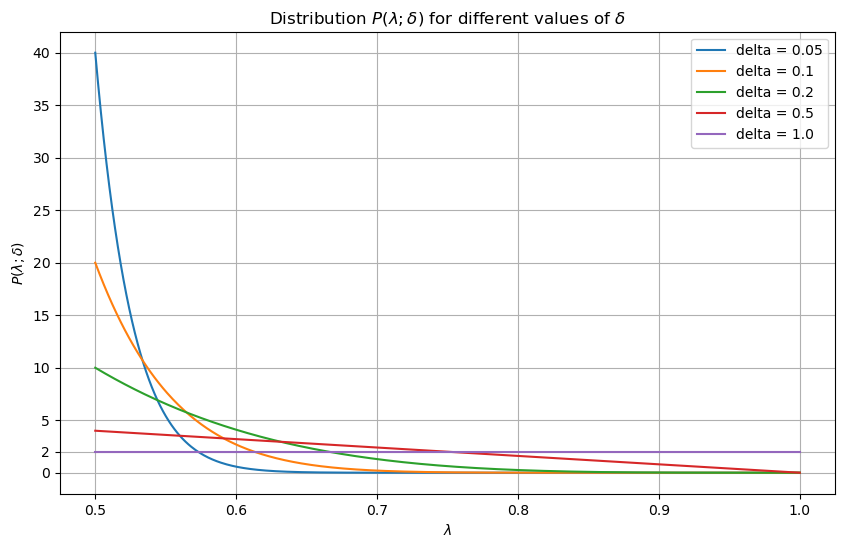

In [3]:
lambdas = np.linspace(0.5, 1, 500)
deltas = [0.05, 0.1, 0.2, 0.5, 1.0]#[0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.0]

fig, ax = plt.subplots(figsize=(10, 6))

for delta in deltas:
    P_lambdas = P(lambdas, delta)
    ax.plot(lambdas, P_lambdas, label=f'delta = {delta}')


ax.set_title('Distribution $P(\lambda; \delta)$ for different values of $\\delta$')
ax.set_xlabel('$\lambda$')
ax.set_ylabel('$P(\lambda; \delta)$')
ax.legend()
#ax.set_ylim([1e-1, 10000])
#ax.set_yscale('log')
# ax.yaxis.set_major_formatter(plt.ScalarFormatter())
ax.set_yticks([0, 2, 5, 10, 15, 20, 25, 30, 35, 40])
ax.grid(True)

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


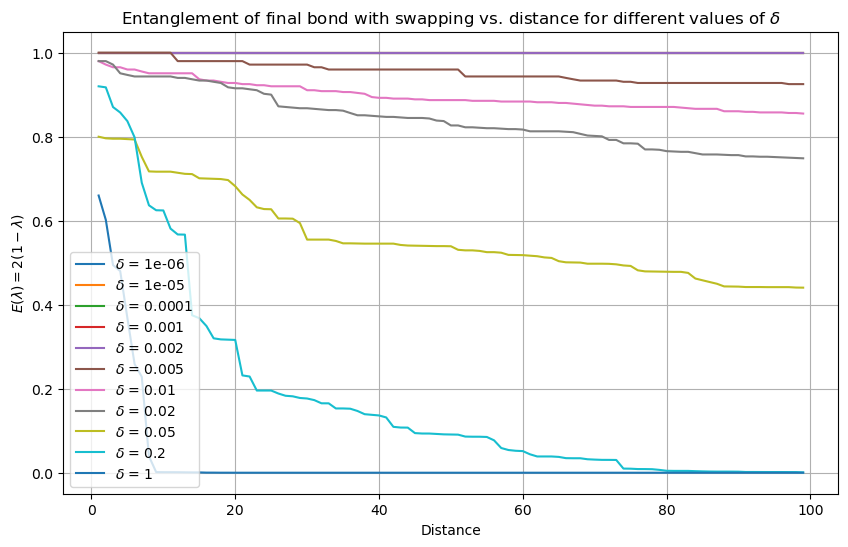

In [4]:
deltas = [1e-6, 1e-5, 1e-4, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.2, 1]
L = 100

plt.figure(figsize=(10, 6))

for delta in deltas:
    lambdas = []
    lambdas.append(gen_lambda(delta))

    for i in range(1, L-1):
        lambdas.append(lambda_swap(gen_lambda(delta), lambdas[-1]))
    
    plt.plot(np.arange(1, 100), 2*(1 - np.array(lambdas)), label=f'$\\delta$ = {delta}')


plt.xlabel('Distance')
plt.ylabel('$E(\lambda) = 2(1-\lambda)$')
plt.title('Entanglement of final bond with swapping vs. distance for different values of $\\delta$')
plt.grid(True)
plt.legend()

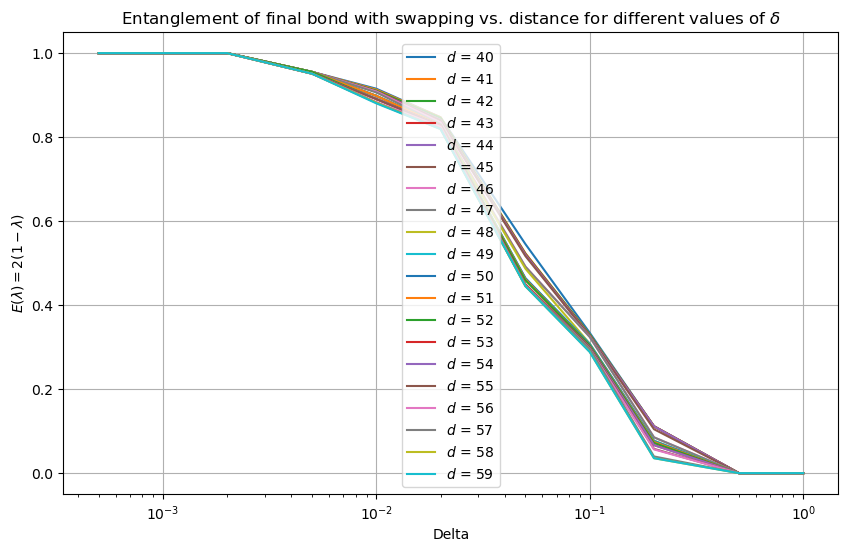

In [5]:
deltas = [0.0005, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.0]
L = 100

plt.figure(figsize=(10, 6))

lambdas = {}

for delta in deltas:
    lambdas[delta] = []
    lambdas[delta].append(gen_lambda(delta))

    for i in range(1, L-1):
        lambdas[delta].append(lambda_swap(gen_lambda(delta), lambdas[delta][-1]))

for i in range(2*L//5, 3*L//5):
    plt.plot(deltas, [2*(1 - np.array(lambdas[delta][i])) for delta in deltas], label=f'$d$ = {i}')

plt.xlabel('Delta')
plt.ylabel('$E(\lambda) = 2(1-\lambda)$')
plt.title('Entanglement of final bond with swapping vs. distance for different values of $\\delta$')
plt.xscale('log')
plt.grid(True)
plt.legend()

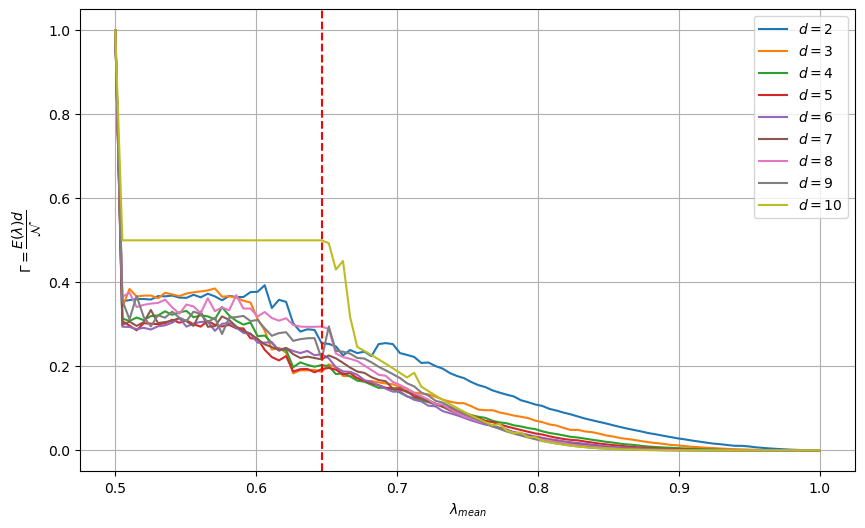

In [6]:
fig, ax = plt.subplots(figsize=(10,6))
# fig2, ax2 = plt.subplots(figsize=(10,6))

lambdas = np.arange(0.5, 1.005, 1/198)

ents = {}
Ns = {}
Ls = []

n = 6
range = 100
for (i, lambda_) in enumerate(lambdas[:range]):

    ents[lambda_] = []
    Ns[lambda_] = []

    with open(f"out_files/{n}/1/res_{n}_{i+1}.out", 'r') as file:
        for line in file:
            tokens = line.split()
            L, ent, N = map(float, tokens)

            if i == 1:
                Ls.append(int(L))

            ents[lambda_].append(ent)
            Ns[lambda_].append(N)

# ax.plot(lambdas[:range], [np.mean([ents[lambda_][d-1]*d/Ns[lambda_][d-1] for d in Ls[1:]]) for lambda_ in lambdas[:range]], label="mean")
for d in Ls[1:]:
    ax.plot(lambdas[:range], np.array([((ents[lambda_][d-1])*(d/Ns[lambda_][d-1])) for lambda_ in lambdas[:range]]), label='$d = {}$'.format(d))#, color='#1f77b4')
    # ax.plot(lambdas[:range], np.array([d/Ns[lambda_][d-1] for lambda_ in lambdas[:range]]), label='$d = {}$'.format(d))#, color='#1f77b4')

# ax2.plot(lambdas, np.concatenate([np.array([np.mean([d/Ns[lambda_][d-1] for d in Ls[1:]]) for lambda_ in lambdas[:30]]), np.array([np.mean([ents[lambda_][d-1]*d/Ns[lambda_][d-1] for d in Ls[1:]]) for lambda_ in lambdas[30:]])]), label="mean")
# for d in Ls[1:]:
#     ax2.plot(lambdas[:range], np.concatenate([np.array([d/Ns[lambda_][d-1] for lambda_ in lambdas[:30]]), np.array([ents[lambda_][d-1]*d/Ns[lambda_][d-1] for lambda_ in lambdas[30:range]])]), label='$d = {}$'.format(d))#, color='#1f77b4')

lambda_c = 0.5*(1+np.sqrt(1-np.sqrt(2*(np.sqrt(2)-1))))


ax.set_xlabel(r'$\lambda_{mean}$')
ax.set_ylabel('$\\Gamma = \dfrac{E(\\lambda)d}{\mathcal{N}}$')
# ax.set_yscale('log')
ax.grid(True)
ax.legend()
#ax.set_yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])



lambda_c = lambdas[29]
ax.axvline(lambda_c, linestyle="dashed", color="red")


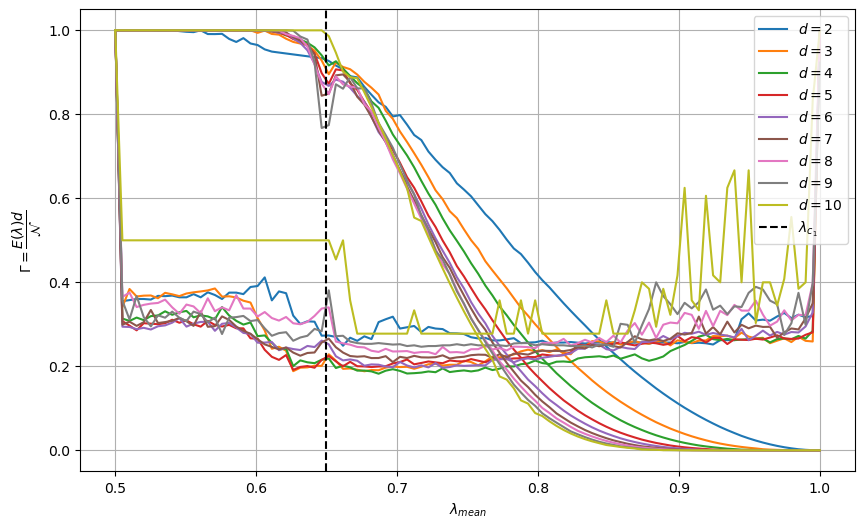

In [7]:
fig, ax = plt.subplots(figsize=(10,6))

lambdas = np.arange(0.5, 1.005, 1/198)

ents = {}
Ns = {}
Ls = []

n = 6
range_ = 100
for (i, lambda_) in enumerate(lambdas[:range_]):
    ents[lambda_] = []
    Ns[lambda_] = []

    with open(f"out_files/{n}/1/res_{n}_{i+1}.out", 'r') as file:
        for line in file:
            tokens = line.split()
            L, ent, N = map(float, tokens)

            if i == 1:
                Ls.append(int(L))

            ents[lambda_].append(ent)
            Ns[lambda_].append(N)

for d in Ls[1:]:
    color = ax._get_lines.get_next_color()  # Get the next color in the cycle
    
    y1 = np.array([ents[lambda_][d-1] for lambda_ in lambdas[:range_]])
    y2 = np.array([d/Ns[lambda_][d-1] for lambda_ in lambdas[:range_]])
    
    ax.plot(lambdas[:range_], y1, label='$d = {}$'.format(d), color=color)
    ax.plot(lambdas[:range_], y2, color=color)

lambda_c = 0.5 * (1 + np.sqrt(1 - np.sqrt(2 * (np.sqrt(2) - 1))))

ax.set_xlabel(r'$\lambda_{mean}$')
ax.set_ylabel('$\\Gamma = \dfrac{E(\\lambda)d}{\mathcal{N}}$')
ax.grid(True)
ax.axvline(lambda_c, linestyle="dashed", color="black", label=r'$\lambda_{c_1}$')
ax.legend()


plt.show()

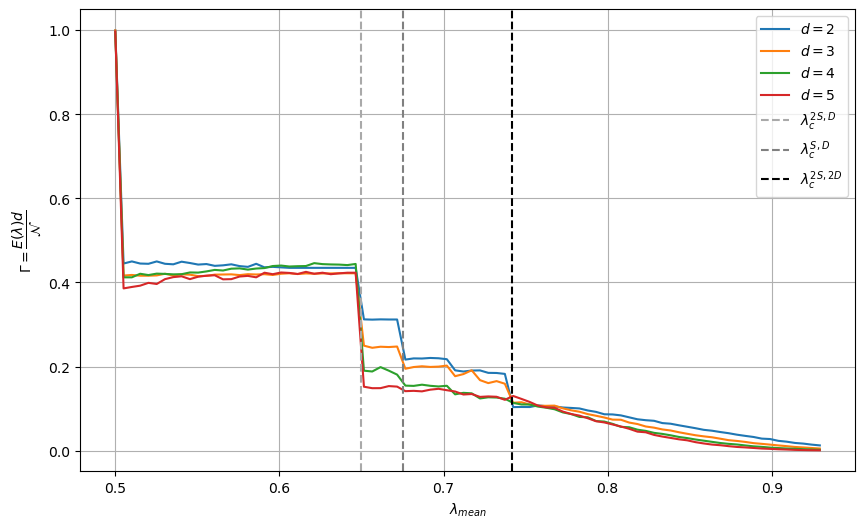

In [17]:
fig, ax = plt.subplots(figsize=(10,6))
# fig2, ax2 = plt.subplots(figsize=(10,6))

lambdas = np.arange(0.5, 1.005, 1/198)

ents = {}
Ns = {}
Ls = []

n = 6
range = 86
for (i, lambda_) in enumerate(lambdas[:range]):
    ents[lambda_] = []
    Ns[lambda_] = []

    with open(f"out_files/diag_{n}/res_{n}_{i+1}.out", 'r') as file:
        for line in file:
            tokens = line.split()
            L, ent, N = map(float, tokens)

            if i == 1:
                Ls.append(int(L))

            ents[lambda_].append(ent)
            Ns[lambda_].append(N)

# ax.plot(lambdas[:range], [np.mean([ents[lambda_][d-1]*d/Ns[lambda_][d-1] for d in Ls[1:]]) for lambda_ in lambdas[:range]], label="mean")
# ax.plot(lambdas[:range], np.concatenate((np.array([ents[lambdas[0]][Ls[0]-1]]), np.array([(ents[lambda_][Ls[0]-1])*(Ls[0]/Ns[lambda_][Ls[0]-1]) for lambda_ in lambdas[1:range]])), axis=None), label='$d = {}$'.format(Ls[0]))#, color='#1f77b4')

for d in Ls[1:]:
    ax.plot(lambdas[:range], np.array([((ents[lambda_][d-1])*(d/Ns[lambda_][d-1])) for lambda_ in lambdas[:range]]), label='$d = {}$'.format(d))#, color='#1f77b4')
    # ax.plot(lambdas[:range], np.array([d/Ns[lambda_][d-1] for lambda_ in lambdas[:range]]), label='$d = {}$'.format(d))#, color='#1f77b4')

# ax2.plot(lambdas, np.concatenate([np.array([np.mean([d/Ns[lambda_][d-1] for d in Ls[1:]]) for lambda_ in lambdas[:30]]), np.array([np.mean([ents[lambda_][d-1]*d/Ns[lambda_][d-1] for d in Ls[1:]]) for lambda_ in lambdas[30:]])]), label="mean")
# for d in Ls[1:]:
#     ax2.plot(lambdas[:range], np.concatenate([np.array([d/Ns[lambda_][d-1] for lambda_ in lambdas[:30]]), np.array([ents[lambda_][d-1]*d/Ns[lambda_][d-1] for lambda_ in lambdas[30:range]])]), label='$d = {}$'.format(d))#, color='#1f77b4')


ax.set_xlabel(r'$\lambda_{mean}$')
ax.set_ylabel('$\\Gamma = \dfrac{E(\\lambda)d}{\mathcal{N}}$')
# ax.set_yscale('log')
ax.grid(True)
lambda_c = 0.5 * (1 + np.sqrt(1 - np.sqrt(2 * (np.sqrt(2) - 1))))
ax.axvline(lambda_c, linestyle="dashed", color="DarkGrey", label=r"$\lambda_{c}^{2S,D}$")
ax.axvline(0.6754005658469, linestyle="dashed", color="grey", label=r'$\lambda_{c}^{S,D}$')
ax.axvline(0.7415981879044, linestyle="dashed", color="black", label=r'$\lambda_{c}^{2S, 2D}$')
ax.legend()
#ax.set_yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

In [18]:
import itertools
import numpy as np

# Function to check if the product of lambda_i's for a subset is greater than 1/2
def check_subset_product(subset, lambda_values):
    product = np.prod([lambda_values[i] for i in subset])
    return product > 1/2

# Find the largest k such that for all subsets of size <= k, the product is > 1/2
def find_largest_k(lambda_values):
    for m in range(n, 0, -1):  # Start from n and decrease k
        all_products_valid = True
        # Generate all subsets of size <= k
        for subset_size in range(1, m+1):
            for subset in itertools.combinations(lambda_values.keys(), subset_size):
                if not check_subset_product(subset, lambda_values):
                    all_products_valid = False
                    break
            if not all_products_valid:
                break
        if all_products_valid:
            return m
    return 0

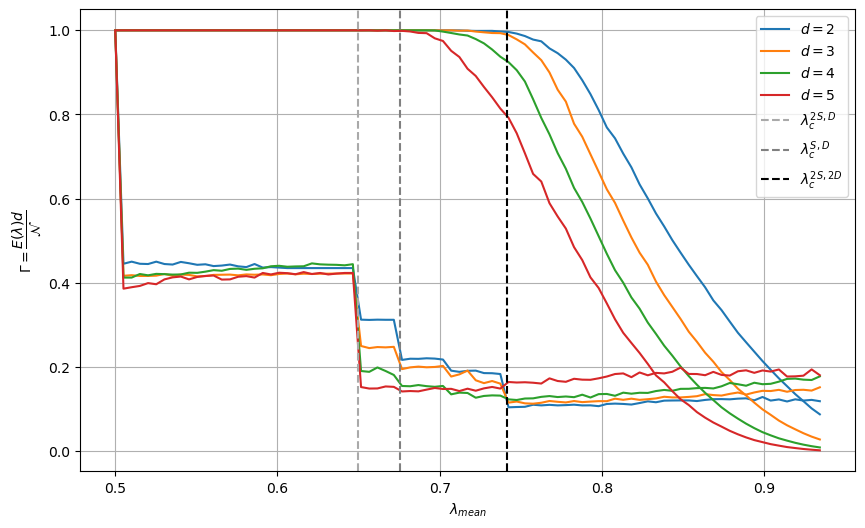

In [20]:
fig, ax = plt.subplots(figsize=(10,6))

lambdas = np.arange(0.5, 1.005, 1/198)

ents = {}
Ns = {}
Ls = []

n = 6
range_ = 87
for (i, lambda_) in enumerate(lambdas[:range_]):
    ents[lambda_] = []
    Ns[lambda_] = []

    with open(f"out_files/diag_{n}/res_{n}_{i+1}.out", 'r') as file:
        for line in file:
            tokens = line.split()
            L, ent, N = map(float, tokens)

            if i == 1:
                Ls.append(int(L))

            ents[lambda_].append(ent)
            Ns[lambda_].append(N)

for d in Ls[1:]:
    color = ax._get_lines.get_next_color()  # Get the next color in the cycle
    
    y1 = np.array([ents[lambda_][d-1] for lambda_ in lambdas[:range_]])
    y2 = np.array([d/Ns[lambda_][d-1] for lambda_ in lambdas[:range_]])
    
    ax.plot(lambdas[:range_], y1, label='$d = {}$'.format(d), color=color)
    ax.plot(lambdas[:range_], y2, color=color)

lambda_c = 0.5 * (1 + np.sqrt(1 - np.sqrt(2 * (np.sqrt(2) - 1))))

ax.set_xlabel(r'$\lambda_{mean}$')
ax.set_ylabel('$\\Gamma = \dfrac{E(\\lambda)d}{\mathcal{N}}$')
ax.grid(True)
lambda_c = 0.5 * (1 + np.sqrt(1 - np.sqrt(2 * (np.sqrt(2) - 1))))
ax.axvline(lambda_c, linestyle="dashed", color="DarkGrey", label=r"$\lambda_{c}^{2S,D}$")
ax.axvline(0.6754005658469, linestyle="dashed", color="grey", label=r'$\lambda_{c}^{S,D}$')
ax.axvline(0.7415981879044, linestyle="dashed", color="black", label=r'$\lambda_{c}^{2S, 2D}$')
ax.legend()


plt.show()

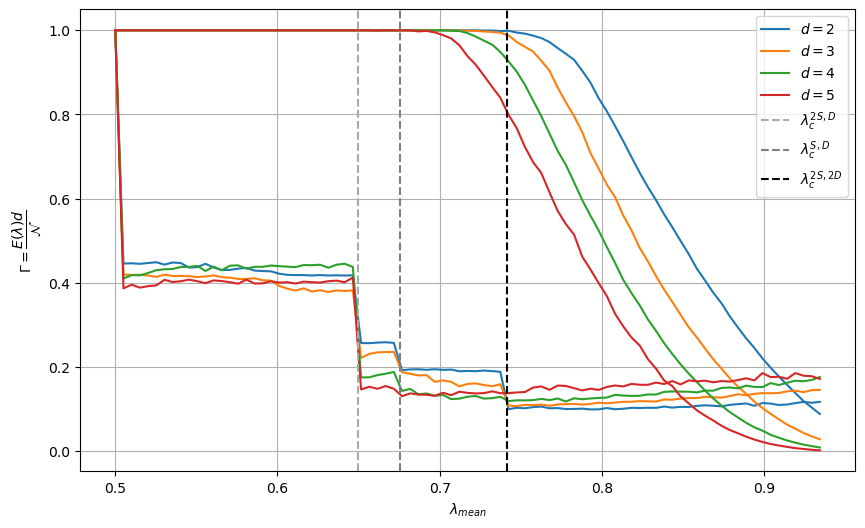

In [21]:
fig, ax = plt.subplots(figsize=(10,6))

lambdas = np.arange(0.5, 1.005, 1/198)

ents = {}
Ns = {}
Ls = []

n = 6
range_ = 87
for (i, lambda_) in enumerate(lambdas[:range_]):
    ents[lambda_] = []
    Ns[lambda_] = []

    with open(f"out_files/diag_{n}/1/res_{n}_{i+1}.out", 'r') as file:
        for line in file:
            tokens = line.split()
            L, ent, N = map(float, tokens)

            if i == 1:
                Ls.append(int(L))

            ents[lambda_].append(ent)
            Ns[lambda_].append(N)

for d in Ls[1:]:
    color = ax._get_lines.get_next_color()  # Get the next color in the cycle
    
    y1 = np.array([ents[lambda_][d-1] for lambda_ in lambdas[:range_]])
    y2 = np.array([d/Ns[lambda_][d-1] for lambda_ in lambdas[:range_]])
    
    ax.plot(lambdas[:range_], y1, label='$d = {}$'.format(d), color=color)
    ax.plot(lambdas[:range_], y2, color=color)

lambda_c = 0.5 * (1 + np.sqrt(1 - np.sqrt(2 * (np.sqrt(2) - 1))))

ax.set_xlabel(r'$\lambda_{mean}$')
ax.set_ylabel('$\\Gamma = \dfrac{E(\\lambda)d}{\mathcal{N}}$')
ax.grid(True)
lambda_c = 0.5 * (1 + np.sqrt(1 - np.sqrt(2 * (np.sqrt(2) - 1))))
ax.axvline(lambda_c, linestyle="dashed", color="DarkGrey", label=r"$\lambda_{c}^{2S,D}$")
ax.axvline(0.6754005658469, linestyle="dashed", color="grey", label=r'$\lambda_{c}^{S,D}$')
ax.axvline(0.7415981879044, linestyle="dashed", color="black", label=r'$\lambda_{c}^{2S, 2D}$')
ax.legend()


plt.show()